In [157]:
# import the libraraies and load the data
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [158]:
#  count of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
# handling null values
df['Age']=df['Age'].fillna(df['Age'].median())
df.fillna({'Embraked':df['Embarked'].mode()[0]},inplace=True)

In [160]:
# feature enginerring
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Embarked_en']=le.fit_transform(df['Embarked'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_en
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [161]:
l={df['Embarked'].unique()[0]:df["Embarked_en"].unique()[0],
   df['Embarked'].unique()[1]:df["Embarked_en"].unique()[1],
   df['Embarked'].unique()[2]:df["Embarked_en"].unique()[2]}
l

{'S': np.int64(2), 'C': np.int64(0), 'Q': np.int64(1)}

In [162]:
# feature engineeering
from sklearn.preprocessing import OrdinalEncoder
en=[["male","female"]]
oe=OrdinalEncoder(categories=en)
oe.fit(df[['Sex']])
df['Sex']=oe.transform(df[['Sex']]).astype('int64')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_en
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2


In [163]:
# drop unrequired features and model selection 
df.drop(labels=['Name','Cabin','Ticket','Embarked','PassengerId'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
x=df.drop(labels='Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [164]:
#standardizaiion and apply randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainscaled=ss.fit_transform(x_train)
x_testscaled=ss.transform(x_test)
lr=RandomForestClassifier()
lr.fit(x_trainscaled,y_train)


RandomForestClassifier()

In [165]:
# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
 
 #predction
y_pred=lr.predict(x_test)

# Accuracy (percentage of correct predictions)
ac= accuracy_score(y_test,y_pred)

# Confusion Matrix (TP, TN, FP, FN)
cm= confusion_matrix(y_test,y_pred)

# classifation report 
cr =classification_report(y_test,y_pred) 
ac

c:\Users\Rituraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.4134078212290503

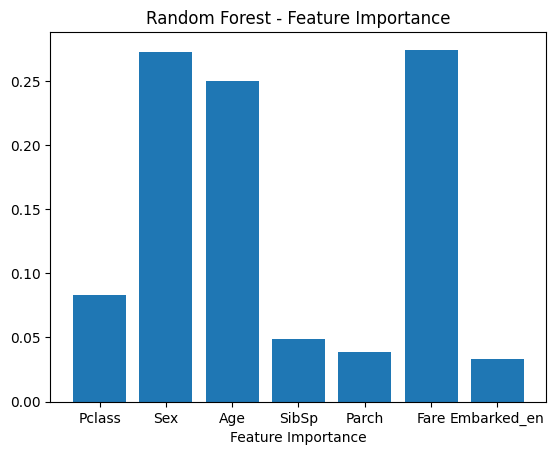

In [167]:
import matplotlib.pyplot as plt

importances = lr.feature_importances_
features = x_train.columns

plt.bar(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest - Feature Importance")
plt.savefig('feature_importance_plot.png')
plt.show()